In [1]:
# DataFrame manipulation libraries:
import pandas as pd
import numpy as np

# Visualization libraries:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Evaluation and processing libraries:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Keras libraries:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../../clean_data/weekly_player_performance_2015_to_2018.csv')
df.head()

,Date,Rank,Name,Team,Position,Week,Opponent,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPoints,Year
0,2015-09-13,1,Carlos Hyde,SF,RB,1,MIN,0,0,0,168,2,2,14,0,0,30.20,2015
1,2015-09-13,2,Tom Brady,NE,QB,1,PIT,288,4,0,1,0,0,0,0,0,27.62,2015
2,2015-09-13,3,Rob Gronkowski,NE,TE,1,PIT,0,0,0,0,0,5,94,3,0,27.40,2015
3,2015-09-13,4,Julio Jones,ATL,WR,1,PHI,0,0,0,0,0,9,141,2,0,26.10,2015
4,2015-09-13,5,Carson Palmer,ARI,QB,1,NO,307,3,0,14,0,0,0,0,0,25.68,2015


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.dtypes

Date                    datetime64[ns]
Rank                             int64
Name                            object
Team                            object
Position                        object
Week                             int64
Opponent                        object
PassingYards                     int64
PassingTouchdowns                int64
PassingInterceptions             int64
RushingYards                     int64
RushingTouchdowns                int64
Receptions                       int64
ReceivingYards                   int64
ReceivingTouchdowns              int64
FumblesLost                      int64
FantasyPoints                  float64
Year                             int64
dtype: object

In [4]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Rank,Name,Team,Position,Week,Opponent,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPoints,Year
Date,,,,,,,,,,,,,,,,,
2015-09-13,1,Carlos Hyde,SF,RB,1,MIN,0,0,0,168,2,2,14,0,0,30.20,2015
2015-09-13,2,Tom Brady,NE,QB,1,PIT,288,4,0,1,0,0,0,0,0,27.62,2015
2015-09-13,3,Rob Gronkowski,NE,TE,1,PIT,0,0,0,0,0,5,94,3,0,27.40,2015
2015-09-13,4,Julio Jones,ATL,WR,1,PHI,0,0,0,0,0,9,141,2,0,26.10,2015
2015-09-13,5,Carson Palmer,ARI,QB,1,NO,307,3,0,14,0,0,0,0,0,25.68,2015


In [5]:
df.shape

(20400, 17)

In [6]:
df_with_dummies = pd.get_dummies(df, columns=['Team', 'Opponent', 'Position'], drop_first=False)
features = [col for col in df_with_dummies.columns if col not in ['Name', 'Week']]
df_with_dummies[features] = df_with_dummies[features].astype(float)
X = df_with_dummies[[col for col in df_with_dummies.columns if col != 'FantasyPoints']]
y = df_with_dummies['FantasyPoints']

In [7]:
X.dtypes

Rank                    float64
Name                     object
Week                      int64
PassingYards            float64
PassingTouchdowns       float64
PassingInterceptions    float64
RushingYards            float64
RushingTouchdowns       float64
Receptions              float64
ReceivingYards          float64
ReceivingTouchdowns     float64
FumblesLost             float64
Year                    float64
Team_ARI                float64
Team_ATL                float64
Team_BAL                float64
Team_BUF                float64
Team_CAR                float64
Team_CHI                float64
Team_CIN                float64
Team_CLE                float64
Team_DAL                float64
Team_DEN                float64
Team_DET                float64
Team_GB                 float64
Team_HOU                float64
Team_IND                float64
Team_JAX                float64
Team_KC                 float64
Team_LAC                float64
                         ...   
Opponent

In [8]:
y.head()

Date
2015-09-13    30.20
2015-09-13    27.62
2015-09-13    27.40
2015-09-13    26.10
2015-09-13    25.68
Name: FantasyPoints, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train.drop(columns = ['Name', 'Week']))
X_test_sc = ss.transform(X_test.drop(columns = ['Name', 'Week']))

In [12]:
X_test_sc[0:5]

array([[ 0.40830156, -0.32569876, -0.26948036, -0.21607813,  0.32653258,
        -0.25192244, -0.51896593, -0.4531034 , -0.38336799, -0.20342918,
        -1.34067133, -0.17684817, -0.18644735, -0.18700964, -0.18794355,
        -0.17860924, -0.17487318, -0.17207467, -0.17684817, -0.17606051,
        -0.18093394, -0.17724085, -0.17625772, -0.18112649, -0.17546773,
        -0.17880398, -0.17625772, -0.17684817,  5.87357131, -0.17880398,
        -0.17958107, -0.18663494, -0.18151105, -0.17977488, -0.17507156,
        -0.18757046, -0.18304223, -0.17996851, -0.18112649, -0.18246935,
        -0.1818949 , -0.18074121, -0.17782843, -0.1818949 , -0.18437293,
        -0.18151105, -0.18380366, -0.17938707, -0.17841432,  5.4976804 ,
        -0.18285144, -0.18285144, -0.17327891, -0.18112649, -0.17821921,
        -0.17821921, -0.18361356, -0.17821921, -0.17899853, -0.17919289,
        -0.17880398, -0.18112649, -0.17841432, -0.18074121, -0.17782843,
        -0.17802392, -0.18456235, -0.18035522, -0.1

In [13]:
X_test_sc.shape

(5100, 80)

In [14]:
model = Sequential()
model.add(Dense(80, activation='relu', input_shape=(80,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [17]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=120, 
                    batch_size=256) #, callbacks = [early_stop])

Instructions for updating:
Use tf.cast instead.
Train on 15300 samples, validate on 5100 samples
Epoch 1/120
15300/15300 [==============================] - 1s 44us/step - loss: 39.1066 - mean_absolute_error: 4.4671 - val_loss: 8.9729 - val_mean_absolute_error: 2.3750
Epoch 2/120
15300/15300 [==============================] - 0s 21us/step - loss: 3.2617 - mean_absolute_error: 1.3080 - val_loss: 1.4834 - val_mean_absolute_error: 0.9200
Epoch 3/120
15300/15300 [==============================] - 0s 16us/step - loss: 1.1654 - mean_absolute_error: 0.8226 - val_loss: 0.9785 - val_mean_absolute_error: 0.7440
Epoch 4/120
15300/15300 [==============================] - 0s 13us/step - loss: 0.7801 - mean_absolute_error: 0.6707 - val_loss: 0.7328 - val_mean_absolute_error: 0.6400
Epoch 5/120
15300/15300 [==============================] - 0s 21us/step - loss: 0.5819 - mean_absolute_error: 0.5774 - val_loss: 0.5927 - val_mean_absolute_error: 0.5707
Epoch 6/120
15300/15300 [===========================

15300/15300 [==============================] - 0s 19us/step - loss: 0.0845 - mean_absolute_error: 0.1962 - val_loss: 0.1894 - val_mean_absolute_error: 0.2701
Epoch 48/120
15300/15300 [==============================] - 0s 14us/step - loss: 0.0812 - mean_absolute_error: 0.1913 - val_loss: 0.1859 - val_mean_absolute_error: 0.2677
Epoch 49/120
15300/15300 [==============================] - 0s 14us/step - loss: 0.0801 - mean_absolute_error: 0.1911 - val_loss: 0.1950 - val_mean_absolute_error: 0.2847
Epoch 50/120
15300/15300 [==============================] - 0s 13us/step - loss: 0.0781 - mean_absolute_error: 0.1892 - val_loss: 0.1825 - val_mean_absolute_error: 0.2672
Epoch 51/120
15300/15300 [==============================] - 0s 13us/step - loss: 0.0785 - mean_absolute_error: 0.1887 - val_loss: 0.1841 - val_mean_absolute_error: 0.2670
Epoch 52/120
15300/15300 [==============================] - 0s 13us/step - loss: 0.0784 - mean_absolute_error: 0.1887 - val_loss: 0.1841 - val_mean_absolute_e

Epoch 95/120
15300/15300 [==============================] - 0s 14us/step - loss: 0.0528 - mean_absolute_error: 0.1518 - val_loss: 0.1755 - val_mean_absolute_error: 0.2453
Epoch 96/120
15300/15300 [==============================] - 0s 13us/step - loss: 0.0514 - mean_absolute_error: 0.1496 - val_loss: 0.1770 - val_mean_absolute_error: 0.2495
Epoch 97/120
15300/15300 [==============================] - 0s 17us/step - loss: 0.0502 - mean_absolute_error: 0.1490 - val_loss: 0.1809 - val_mean_absolute_error: 0.2587
Epoch 98/120
15300/15300 [==============================] - 0s 17us/step - loss: 0.0496 - mean_absolute_error: 0.1467 - val_loss: 0.1725 - val_mean_absolute_error: 0.2439
Epoch 99/120
15300/15300 [==============================] - 0s 18us/step - loss: 0.0498 - mean_absolute_error: 0.1479 - val_loss: 0.1812 - val_mean_absolute_error: 0.2587
Epoch 100/120
15300/15300 [==============================] - 0s 14us/step - loss: 0.0501 - mean_absolute_error: 0.1486 - val_loss: 0.1818 - val_m

In [18]:
preds = model.predict(X_test_sc)
preds

array([[ 2.9310188],
       [ 8.642102 ],
       [11.719722 ],
       ...,
       [ 0.6667658],
       [ 4.769348 ],
       [ 0.6450291]], dtype=float32)

In [19]:
y_test.head()

Date
2015-11-29     3.0
2016-12-18     9.2
2015-12-20    11.4
2018-12-30    15.4
2018-11-25     2.2
Name: FantasyPoints, dtype: float64

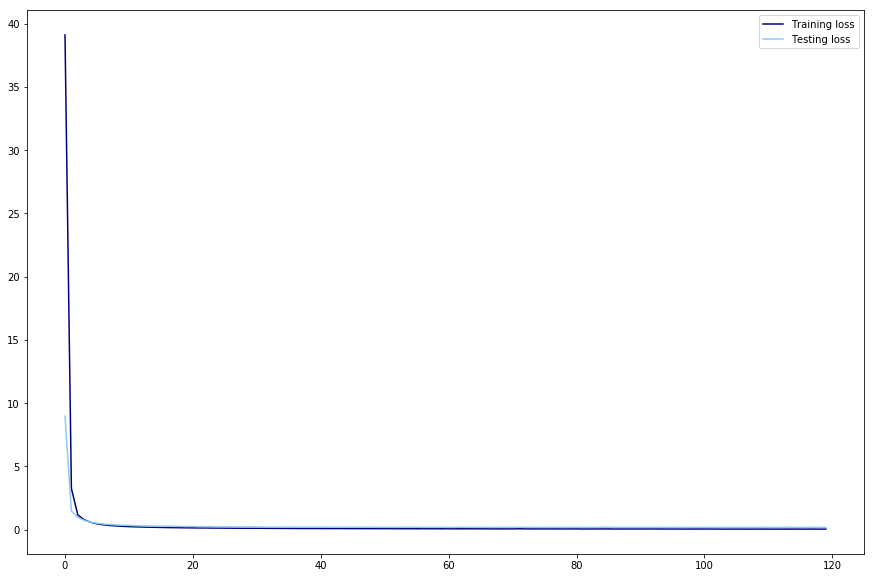

In [20]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(15, 10))

# Plot training and testing loss for the original model:
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')

plt.legend();

plt.savefig('../../images/adjusted_FFNN_fantasy_predictions_loss_function_plot.png')

In [21]:
X_test['Predicted_FP'] = preds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
X_test['FantasyPoints'] = y_test

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
X_test.head()

,Rank,Name,Week,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,...,Opponent_TB,Opponent_TEN,Opponent_WAS,Position_FB,Position_QB,Position_RB,Position_TE,Position_WR,Predicted_FP,FantasyPoints
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-29,181.0,Todd Gurley,12,0.0,0.0,0.0,19.0,0.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.931019,3.0
2016-12-18,88.0,Mark Ingram,15,0.0,0.0,0.0,78.0,0.0,2.0,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.642102,9.2
2015-12-20,70.0,Rob Gronkowski,15,0.0,0.0,0.0,0.0,0.0,5.0,54.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.719722,11.4
2018-12-30,36.0,Cole Beasley,17,0.0,0.0,0.0,0.0,0.0,6.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.487803,15.4
2018-11-25,189.0,Giovani Bernard,12,0.0,0.0,0.0,10.0,0.0,1.0,12.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.360620,2.2


In [24]:
# Testing data MSE and RMSE:
test_mse = mean_squared_error(preds, y_test)
print('MSE = ', test_mse)
print('RMSE = ', np.sqrt(test_mse))

MSE =  0.17417715305201653
RMSE =  0.4173453642392791


In [25]:
# Training data MSE and RMSE:
train_preds = model.predict(X_train_sc)
train_mse = mean_squared_error(train_preds, y_train)
print('MSE = ', train_mse)
print('RMSE = ', np.sqrt(train_mse))

MSE =  0.039957603944347574
RMSE =  0.19989398176120154


In [26]:
X_train['FantasyPoints'] = y_train
X_train['Predicted_FP'] = train_preds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
X_train.head()

,Rank,Name,Week,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,...,Opponent_TB,Opponent_TEN,Opponent_WAS,Position_FB,Position_QB,Position_RB,Position_TE,Position_WR,FantasyPoints,Predicted_FP
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-13,177.0,Marques Colston,1,0.0,0.0,0.0,0.0,0.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.90,3.052405
2018-11-04,228.0,AJ McCarron,9,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.32,0.380686
2018-09-23,213.0,Torrey Smith,3,0.0,0.0,0.0,0.0,0.0,3.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.90,1.881282
2018-09-16,283.0,Damien Williams,2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.20,0.124504
2017-11-05,233.0,Dwayne Washington,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.10,0.167918
